<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/gilbut_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4

## Train, test and validation

Holdout validation

In [ ]:
# num_validation_samples = 10000

# np.random.shuffle(data)

# validation_data = data[: num_validation_samples]
# data = data[num_validation_samples :]

# training_data = data[:]

# model = get_model()
# model.train(training_data)
# validation_score = model.evaluate(validation_data)

# ###################################
# #  tuning, retrain, evaluate, ... #
# ###################################

# model = get_model()
# model.train(np.concatenate([training_data, validation_data]))

# tset_score = model.evaluate(test_data)

K-Fold cross validation

In [ ]:
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples * fold : num_validation_samples * (fold + 1)]
  training_data = data[: num_validation_samples * fold] + data[num_validation_samples * (fold + 1) :]

  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.append(validation_score)


validation_score = np.average(validation_scores)

model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

## Ways to prevent overfitting

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
                                                        num_words = 10000)        # 10000 most frequent words

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))                                 # zero matrix with size of (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
## Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Original model

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 43ms/step - loss: 0.5209 - accuracy: 0.7970 - val_loss: 0.3992 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3198 - accuracy: 0.9018 - val_loss: 0.3103 - val_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2357 - accuracy: 0.9253 - val_loss: 0.2808 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1867 - accuracy: 0.9415 - val_loss: 0.2738 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1511 - accuracy: 0.9519 - val_loss: 0.3063 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1244 - accuracy: 0.9617 - val_loss: 0.2871 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.3012 - val_accuracy: 0.8876
Epoch 8/20
30

### Reducing the size of network

Smaller model

In [11]:
model_s = models.Sequential()
model_s.add(layers.Dense(6, activation = 'relu', input_shape= (10000,)))
model_s.add(layers.Dense(6, activation = 'relu'))
model_s.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model_s.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_s = model_s.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5530 - accuracy: 0.7832 - val_loss: 0.4502 - val_accuracy: 0.8513
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3746 - accuracy: 0.8953 - val_loss: 0.3604 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2840 - accuracy: 0.9168 - val_loss: 0.3077 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2280 - accuracy: 0.9309 - val_loss: 0.2894 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1913 - accuracy: 0.9419 - val_loss: 0.2838 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1617 - accuracy: 0.9517 - val_loss: 0.2767 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1398 - accuracy: 0.9587 - val_loss: 0.2768 - val_accuracy: 0.8889
Epoch 8/20
30

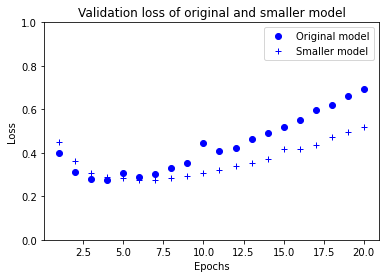

In [19]:
## Loss of original model vs smaller model

import matplotlib.pyplot as plt

history_dict = history.history
history_dict_s = history_s.history

val_loss = history_dict['val_loss']
val_loss_s = history_dict_s['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label = 'Original model')
plt.plot(epochs, val_loss_s, 'b+', label = 'Smaller model')
plt.title('Validation loss of original and smaller model')
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Smaller model이 더 나중에 과대적합됟다. ==> good

Bigger model

In [15]:
model_b = models.Sequential()
model_b.add(layers.Dense(1024, activation = 'relu', input_shape= (10000,)))
model_b.add(layers.Dense(1024, activation = 'relu'))
model_b.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model_b.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_b = model_s.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0115 - accuracy: 0.9991 - val_loss: 0.5677 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0089 - accuracy: 0.9994 - val_loss: 0.5875 - val_accuracy: 0.8691
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 0.6282 - val_accuracy: 0.8677
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0052 - accuracy: 0.9997 - val_loss: 0.6505 - val_accuracy: 0.8686
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.6966 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.7280 - val_accuracy: 0.8656
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.7518 - val_accuracy: 0.8641
Epoch 8/20
30

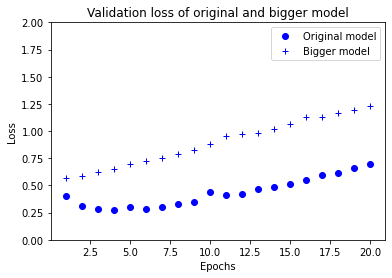

In [18]:
## Loss of original model vs bigger model

import matplotlib.pyplot as plt

history_dict = history.history
history_dict_b = history_b.history

val_loss = history_dict['val_loss']
val_loss_b = history_dict_b['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label = 'Original model')
plt.plot(epochs, val_loss_b, 'b+', label = 'Bigger model')
plt.title('Validation loss of original and bigger model')
plt.ylim(0,2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Bigger model은 처음부터 과대적합 시작됨 ==> bad

### Adding weight regularization

L2 weight regularization

In [23]:
# movie review data

from keras import regularizers

model_l2 = models. Sequential()
model_l2.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),           # l2(0.001) = 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱해 네트워크의 전체 손실에 더해짐.
                       activation = 'relu', input_shape = (10000,)))
model_l2.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                       activation = 'relu'))
model_l2.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model_l2.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5803 - accuracy: 0.7899 - val_loss: 0.4650 - val_accuracy: 0.8662
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3945 - accuracy: 0.8900 - val_loss: 0.3850 - val_accuracy: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3199 - accuracy: 0.9133 - val_loss: 0.3595 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2786 - accuracy: 0.9247 - val_loss: 0.3358 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2532 - accuracy: 0.9329 - val_loss: 0.3342 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2359 - accuracy: 0.9393 - val_loss: 0.3341 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2241 - accuracy: 0.9449 - val_loss: 0.3417 - val_accuracy: 0.8834
Epoch 8/20
30

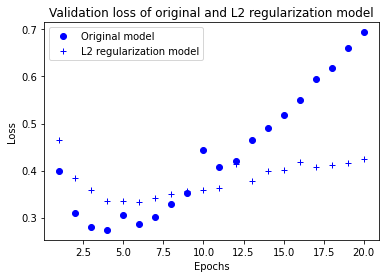

In [26]:
## Loss of original model vs L2 regularization model

import matplotlib.pyplot as plt

history_dict = history.history
history_dict_l2 = history_l2.history

val_loss = history_dict['val_loss']
val_loss_l2 = history_dict_l2['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label = 'Original model')
plt.plot(epochs, val_loss_l2, 'b+', label = 'L2 regularization model')
plt.title('Validation loss of original and L2 regularization model')
# plt.ylim(0,2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
# ## another weight regularization

# from keras import regularizers

# regularizers.l1(0.001)
# regularizers.l1_l2(l1 = 0.001, l2 = 0.001)

### Adding dropout

In [29]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [30]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))                                 # zero matrix with size of (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
## Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Original model

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [37]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5246 - accuracy: 0.7884 - val_loss: 0.4111 - val_accuracy: 0.8614
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3229 - accuracy: 0.9009 - val_loss: 0.3150 - val_accuracy: 0.8896
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2396 - accuracy: 0.9233 - val_loss: 0.2837 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1903 - accuracy: 0.9390 - val_loss: 0.2761 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1522 - accuracy: 0.9529 - val_loss: 0.2938 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1263 - accuracy: 0.9609 - val_loss: 0.2871 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.2976 - val_accuracy: 0.8852
Epoch 8/20
30

dropout model

In [36]:
model_dr = models.Sequential()
model_dr.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(16, activation = 'relu'))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(1, activation = 'sigmoid'))

In [38]:
model_dr.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_dr = model_dr.fit(partial_x_train,
                          partial_y_train,
                          epochs = 20,
                          batch_size = 512,
                          validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6108 - accuracy: 0.6615 - val_loss: 0.4752 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4830 - accuracy: 0.7925 - val_loss: 0.3918 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3991 - accuracy: 0.8423 - val_loss: 0.3169 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3441 - accuracy: 0.8699 - val_loss: 0.2944 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2955 - accuracy: 0.8894 - val_loss: 0.2810 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2611 - accuracy: 0.9106 - val_loss: 0.2701 - val_accuracy: 0.8929
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2317 - accuracy: 0.9205 - val_loss: 0.2739 - val_accuracy: 0.8921
Epoch 8/20
30

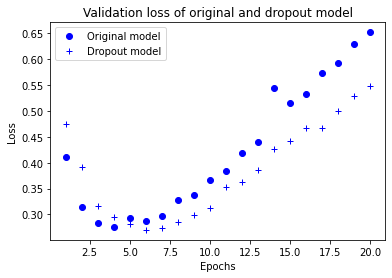

In [39]:
## Loss of original model vs dropout model

import matplotlib.pyplot as plt

history_dict = history.history
history_dict_dr = history_dr.history

val_loss = history_dict['val_loss']
val_loss_dr = history_dict_dr['val_loss']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label = 'Original model')
plt.plot(epochs, val_loss_dr, 'b+', label = 'Dropout model')
plt.title('Validation loss of original and dropout model')
# plt.ylim(0,2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()